In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
    vol_0=e1t*e2t*e3t_0*mesh.variables['tmask'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/shortTest1_11/'

In [5]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])
fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fD2=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia2_T*.nc')[0])

In [6]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
            'layer6m_W', 'layer6m_W_bounds')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,fD.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))

In [7]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
           'layer6m_W', 'layer6m_W_bounds')
def checkallSlice(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            print(var,':',np.min(ff.variables[var][-1,:,:,:]),
                      np.max(ff.variables[var][-1,:,:,:]))

In [8]:
checkall(fP)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3RAD', 'RIV_NO3', 'RIV_NH4', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'REFRN', 'TBS_DIAT', 'TBS_PON'])
Min/Max:
NO3RAD : 0.0 0.00039374374
RIV_NO3 : 0.0 10410.278
RIV_NH4 : 0.0 5788.9
REM_NO3 : 0.0 10.646122
REM_PON : -7.5526934 -0.0
REM_DON : -13.308616 -0.0
PRD_NO3 : -24.355164 -0.0
PRD_NH4 : -6.5008626 -0.0
REFRN : -5.481813e-07 1.0391839e-23
TBS_DIAT : -16.36795 17.202686
TBS_PON : -38.046337 28.42843


In [9]:
checkall(fD)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'PH1_NO3', 'PH1_NH4', 'PH1_DON', 'PH1_PON', 'PH1_LIV'])
Min/Max:
ATF_NO3 : -1.4363837 1.8466758
ATF_NH4 : -0.14218323 0.122455984
ATF_DON : -0.27935246 0.18488091
ATF_PON : -0.05379137 0.054181207
ATF_LIV : -0.26654717 0.21569796
PH1_NO3 : -430.58463 350.86227
PH1_NH4 : -59.965492 65.24575
PH1_DON : -49.124607 58.203037
PH1_PON : -18.315426 26.071451
PH1_LIV : -79.859146 71.13617


In [10]:
checkall(fD2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PH2_NO3', 'PH2_NH4', 'PH2_DON', 'PH2_PON', 'PH2_LIV', 'PHS_NO3', 'PHS_NH4', 'PHS_DON', 'PHS_PON', 'PHS_LIV'])
Min/Max:
PH2_NO3 : -431.2696 350.3977
PH2_NH4 : -59.93658 65.22324
PH2_DON : -48.88622 58.20496
PH2_PON : -18.382517 26.155497
PH2_LIV : -80.447105 71.33389
PHS_NO3 : -10411.89 348.58524
PHS_NH4 : -5787.5576 64.89241
PHS_DON : -48.137848 58.726234
PHS_PON : -30.114664 36.443047
PHS_LIV : -74.20433 72.92383


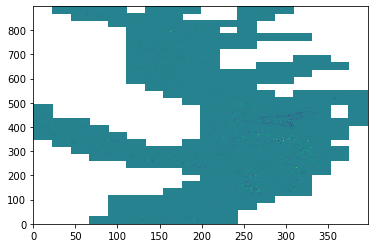

In [13]:
plt.pcolormesh(fD.variables['ATF_NH4'][0,0,:,:])

In [12]:
afiltSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NO3'][:,:,:,:],3),2),1)
afiltSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NH4'],3),2),1)
afiltSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_PON'],3),2),1)
afiltSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_DON'],3),2),1)
afiltSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_LIV'],3),2),1)

In [13]:
phsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NO3'],3),2),1)
phsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NH4'],3),2),1)
phsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_PON'],3),2),1)
phsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_DON'],3),2),1)
phsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_LIV'],3),2),1)

In [15]:
ph1SumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['PH1_NO3'],3),2),1)
ph1SumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['PH1_NH4'],3),2),1)
ph1SumPON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['PH1_PON'],3),2),1)
ph1SumDON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['PH1_DON'],3),2),1)
ph1SumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['PH1_LIV'],3),2),1)

In [16]:
ph2SumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PH2_NO3'],3),2),1)
ph2SumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PH2_NH4'],3),2),1)
ph2SumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PH2_PON'],3),2),1)
ph2SumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PH2_DON'],3),2),1)
ph2SumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PH2_LIV'],3),2),1)

In [17]:
fS=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_snp_T_20150501-20150505.nc')

In [18]:
checkall(fS)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NO3_E3TSNAP', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP'])
Min/Max:
unknown shape:  time_instant 1
unknown shape:  time_instant_bounds 2
NO3_E3TSNAP : 0.0 962.8327
NH4_E3TSNAP : 0.0 75.67484
PON_E3TSNAP : 0.0 28.080706
DON_E3TSNAP : 0.0 51.29791
LIV_E3TSNAP : 0.0 69.72874


In [19]:
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nh4Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NH4_E3TSNAP'][:,:,:,:],3),2),1)
ponSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['PON_E3TSNAP'][:,:,:,:],3),2),1)
donSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['DON_E3TSNAP'][:,:,:,:],3),2),1)
livSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['LIV_E3TSNAP'][:,:,:,:],3),2),1)

In [20]:
no3Sum

masked_array(data=[32694702840426.04, 32619588679646.23,
                   32517292310884.44, 32435143211853.055,
                   32366397388221.305],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [21]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)
nh4diff=(nh4Sum[1:]-nh4Sum[:-1])/(24*3600)
pondiff=(ponSum[1:]-ponSum[:-1])/(24*3600)
dondiff=(donSum[1:]-donSum[:-1])/(24*3600)
livdiff=(livSum[1:]-livSum[:-1])/(24*3600)

Text(0.5, 1.0, 'DON')

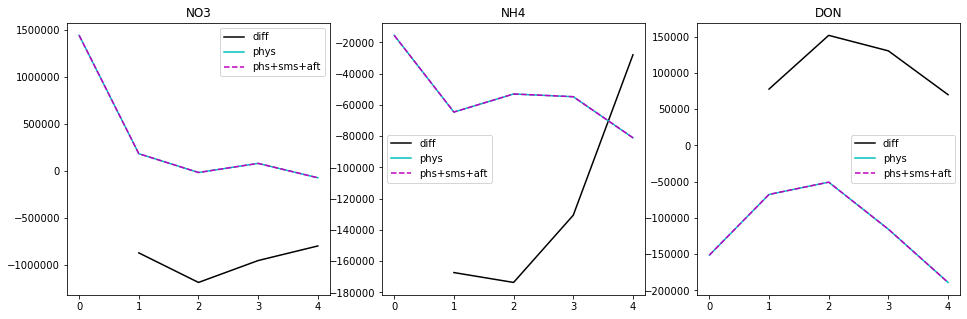

In [26]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='diff')
ax[0].plot(range(0,5),phsSumNO3,'c-',label='phys')
ax[0].plot(range(0,5),phsSumNO3+afiltSumNO3,'m--',label='phs+sms+aft')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(1,5),nh4diff,'k-',label='diff')
ax[1].plot(range(0,5),phsSumNH4,'c-',label='phys')
ax[1].plot(range(0,5),phsSumNH4+afiltSumNH4,'m--',label='phs+sms+aft')
ax[1].legend()
ax[1].set_title('NH4')
ax[2].plot(range(1,5),dondiff,'k-',label='diff')
ax[2].plot(range(0,5),phsSumDON,'c-',label='phys')
ax[2].plot(range(0,5),phsSumDON+afiltSumDON,'m--',label='phs+sms+aft')
ax[2].legend()
ax[2].set_title('DON')

Text(0.5, 1.0, 'DON')

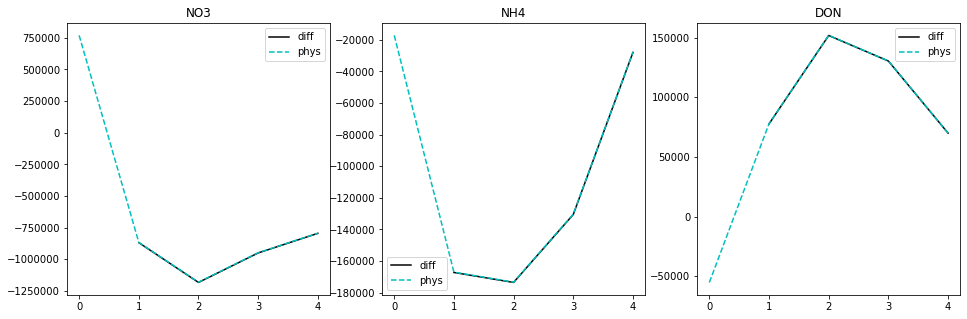

In [30]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='diff')
ax[0].plot(range(0,5),ph1SumNO3,'c--',label='phys')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(1,5),nh4diff,'k-',label='diff')
ax[1].plot(range(0,5),ph1SumNH4,'c--',label='phys')
ax[1].legend()
ax[1].set_title('NH4')
ax[2].plot(range(1,5),dondiff,'k-',label='diff')
ax[2].plot(range(0,5),ph1SumDON,'c--',label='phys')
ax[2].legend()
ax[2].set_title('DON')

Text(0.5, 1.0, 'DON')

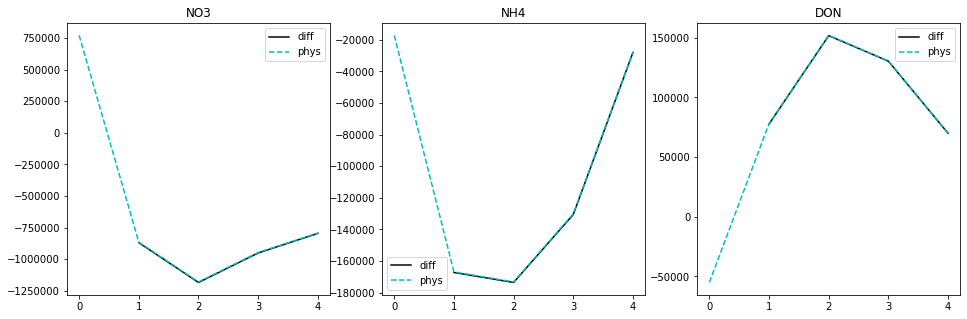

In [29]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='diff')
ax[0].plot(range(0,5),ph2SumNO3,'c--',label='phys')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(1,5),nh4diff,'k-',label='diff')
ax[1].plot(range(0,5),ph2SumNH4,'c--',label='phys')
ax[1].legend()
ax[1].set_title('NH4')
ax[2].plot(range(1,5),dondiff,'k-',label='diff')
ax[2].plot(range(0,5),ph2SumDON,'c--',label='phys')
ax[2].legend()
ax[2].set_title('DON')

In [51]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    checkallSlice(f)
    malUA=np.sum(np.sum(f.variables['ATX_NO3'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['DTX_NO3'][:,:,:,0],2),1)
    malUANH4=np.sum(np.sum(f.variables['ATX_NH4'][:,:,:,0],2),1)
    malUDNH4=np.sum(np.sum(f.variables['DTX_NH4'][:,:,:,0],2),1)
    malUADON=np.sum(np.sum(f.variables['ATX_DON'][:,:,:,0],2),1)
    malUDDON=np.sum(np.sum(f.variables['DTX_DON'][:,:,:,0],2),1)
    malUAPON=np.sum(np.sum(f.variables['ATX_PON'][:,:,:,0],2),1)
    malUDPON=np.sum(np.sum(f.variables['DTX_PON'][:,:,:,0],2),1)
    malUALIV=np.sum(np.sum(f.variables['ATX_LIV'][:,:,:,0],2),1)
    malUDLIV=np.sum(np.sum(f.variables['DTX_LIV'][:,:,:,0],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthu', 'depthu_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATX_NO3', 'ATX_NH4', 'ATX_PON', 'ATX_DON', 'ATX_LIV', 'DTX_NO3', 'DTX_NH4', 'DTX_PON', 'DTX_DON', 'DTX_LIV'])
Min/Max:
ATX_NO3 : -20666.713 16776.5
ATX_NH4 : -1437.2938 957.4427
ATX_PON : -524.11743 356.60318
ATX_DON : -406.97272 489.79315
ATX_LIV : -365.97794 425.43466
DTX_NO3 : -6.3189526 7.2546043
DTX_NH4 : -0.46853262 0.9368903
DTX_PON : -1.3051316 2.3274853
DTX_DON : -1.2484218 0.93771315
DTX_LIV : -0.6433595 0.68395066


In [52]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    checkallSlice(f)
    print(f.variables.keys())
    harVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    harVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    harVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    harVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    harVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    harVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    harVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    harVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    harVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -15903.412 48869.727
ATY_NH4 : -1393.2809 3303.8552
ATY_PON : -555.3177 1272.2675
ATY_DON : -903.312 1504.8889
ATY_LIV : -1438.2727 2208.8413
DTY_NO3 : -4.663913 13.318257
DTY_NH4 : -0.6031008 0.30306715
DTY_PON : -0.62032694 0.13560116
DTY_DON : -1.9465337 0.6254739
DTY_LIV : -2.6908896 1.4649214
dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])


In [53]:
harVANH4

masked_array(data=[  2496.374 , -30269.613 , -11858.67  ,   1614.4971,
                   -11604.06  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [54]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    checkallSlice(f)
    sjcVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    sjcVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    sjcVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    sjcVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    sjcVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    sjcVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    sjcVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    sjcVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    sjcVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -25802.738 29774.682
ATY_NH4 : -3406.2297 3347.7947
ATY_PON : -1423.871 1331.2312
ATY_DON : -2952.7551 2621.7249
ATY_LIV : -4307.275 3995.841
DTY_NO3 : -2.363399 7.576811
DTY_NH4 : -0.48089275 0.113037355
DTY_PON : -0.43021125 0.11556651
DTY_DON : -1.0954756 0.22043633
DTY_LIV : -1.2199055 2.3640828


In [55]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    checkallSlice(f)
    rosVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    rosVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    rosVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    rosVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    rosVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    rosVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    rosVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    rosVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    rosVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -16861.389 10010.339
ATY_NH4 : -2369.0361 1068.1669
ATY_PON : -1101.6398 386.45978
ATY_DON : -1791.8093 392.35834
ATY_LIV : -2305.6284 474.8689
DTY_NO3 : -2.503838 10.688172
DTY_NH4 : -0.07703006 0.5477374
DTY_PON : -0.51903015 0.26186857
DTY_DON : -2.001331 0.41666704
DTY_LIV : -3.111996 0.44228303


In [56]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    checkallSlice(f)
    sutVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    sutVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    sutVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    sutVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    sutVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    sutVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    sutVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    sutVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    sutVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -24502.857 13157.149
ATY_NH4 : -1970.5421 716.3847
ATY_PON : -743.74475 241.82123
ATY_DON : -598.67316 382.68954
ATY_LIV : -606.88684 391.90457
DTY_NO3 : -5.8792663 7.3238955
DTY_NH4 : -0.6195536 0.6464085
DTY_PON : -1.5428258 0.58201706
DTY_DON : -1.2420498 0.8882713
DTY_LIV : -0.7872189 0.5257804


In [57]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    checkallSlice(f)
    disVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    disVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    disVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    disVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    disVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    disVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    disVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    disVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    disVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -8940.418 14389.341
ATY_NH4 : -2547.5217 1468.6569
ATY_PON : -868.22644 479.06088
ATY_DON : -3306.8604 977.64935
ATY_LIV : -3475.3618 1061.3331
DTY_NO3 : -1.7540287 15.175859
DTY_NH4 : -0.42687368 0.051963255
DTY_PON : -0.21732087 0.06654824
DTY_DON : -1.9633943 0.28427923
DTY_LIV : -1.9034162 0.30711904


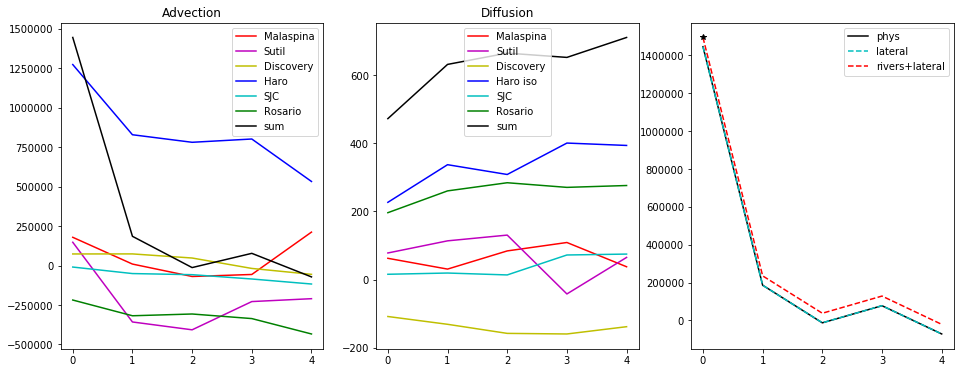

In [58]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumNO3,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSumNO3,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSumNO3[0],'k*')
ax[2].legend()

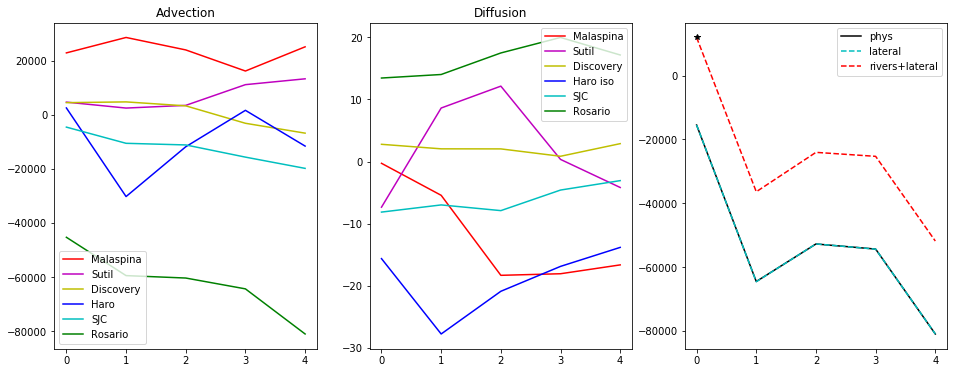

In [59]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUANH4,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVANH4,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVANH4,'y-',label='Discovery')
ax[0].plot(range(0,5),harVANH4,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVANH4,'c-',label='SJC')
ax[0].plot(range(0,5),rosVANH4,'g-',label='Rosario')
adv=harVANH4+sjcVANH4+rosVANH4-disVANH4-sutVANH4-malUANH4
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDNH4,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDNH4,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDNH4,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDNH4,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDNH4,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDNH4,'g-',label='Rosario')
dif=harVDNH4+sjcVDNH4+rosVDNH4-disVDNH4-sutVDNH4-malUDNH4
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumNH4,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSumNH4,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSumNH4[0],'k*')
ax[2].legend()

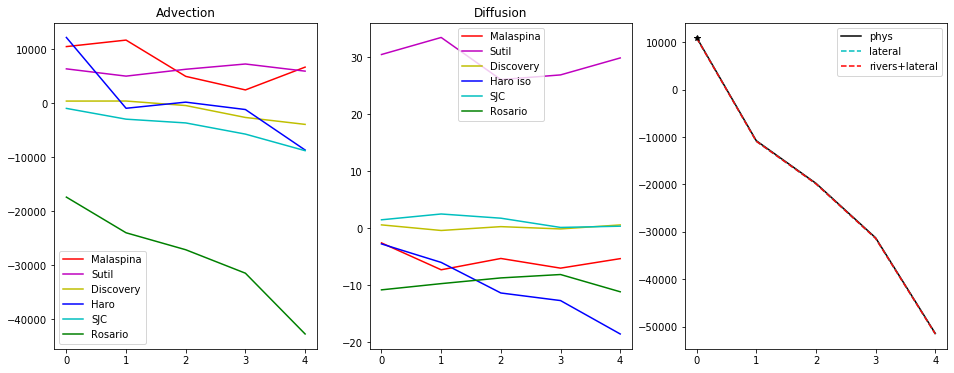

In [60]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUAPON,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVAPON,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVAPON,'y-',label='Discovery')
ax[0].plot(range(0,5),harVAPON,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVAPON,'c-',label='SJC')
ax[0].plot(range(0,5),rosVAPON,'g-',label='Rosario')
adv=harVAPON+sjcVAPON+rosVAPON-disVAPON-sutVAPON-malUAPON
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDPON,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDPON,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDPON,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDPON,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDPON,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDPON,'g-',label='Rosario')
dif=harVDPON+sjcVDPON+rosVDPON-disVDPON-sutVDPON-malUDPON
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumPON,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

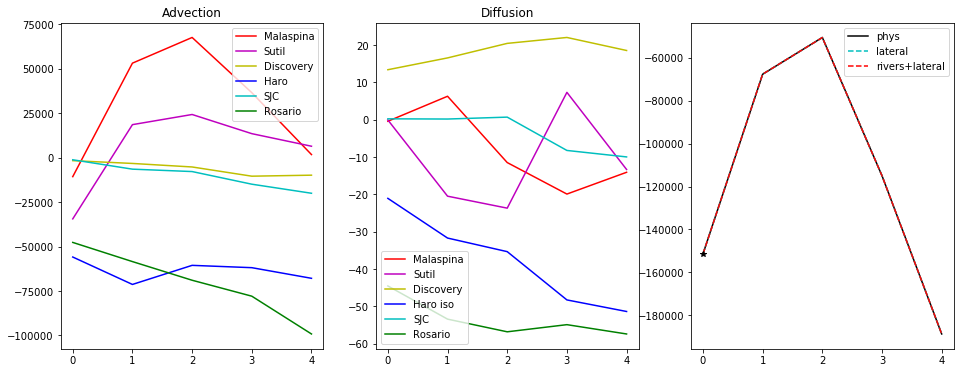

In [61]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUADON,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVADON,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVADON,'y-',label='Discovery')
ax[0].plot(range(0,5),harVADON,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVADON,'c-',label='SJC')
ax[0].plot(range(0,5),rosVADON,'g-',label='Rosario')
adv=harVADON+sjcVADON+rosVADON-disVADON-sutVADON-malUADON
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDDON,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDDON,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDDON,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDDON,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDDON,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDDON,'g-',label='Rosario')
dif=harVDDON+sjcVDDON+rosVDDON-disVDDON-sutVDDON-malUDDON
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumDON,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

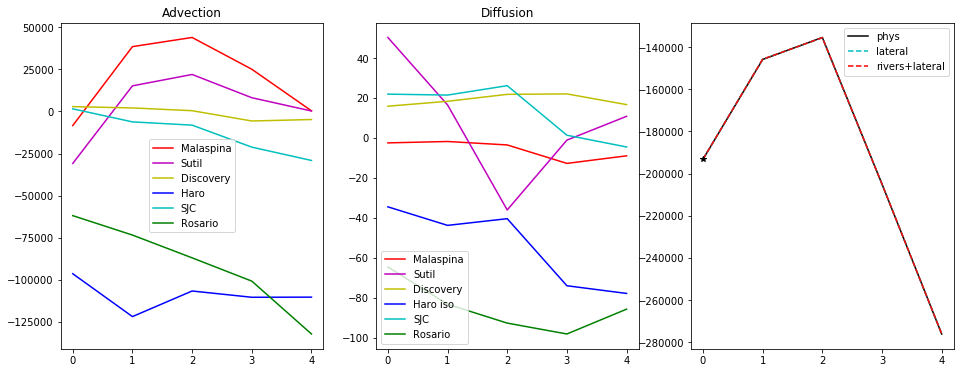

In [62]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUALIV,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVALIV,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVALIV,'y-',label='Discovery')
ax[0].plot(range(0,5),harVALIV,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVALIV,'c-',label='SJC')
ax[0].plot(range(0,5),rosVALIV,'g-',label='Rosario')
adv=harVALIV+sjcVALIV+rosVALIV-disVALIV-sutVALIV-malUALIV
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDLIV,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDLIV,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDLIV,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDLIV,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDLIV,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDLIV,'g-',label='Rosario')
dif=harVDLIV+sjcVDLIV+rosVDLIV-disVDLIV-sutVDLIV-malUDLIV
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumLiv,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

In [63]:
fW=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_layer6m_W_20150501-20150505.nc')
fW2=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_layer6m_W_2_20150501-20150505.nc')

In [64]:
checkallSlice(fW)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'VMIXNO3', 'VMIXNH4', 'VMIXPON', 'VMIXDON', 'VMIXLIV', 'ATZ_NO3', 'ATZ_NH4', 'ATZ_PON', 'ATZ_DON', 'ATZ_LIV'])
Min/Max:
VMIXNO3 : -0.0015695989 0.17406946
VMIXNH4 : -0.0007000049 0.010415169
VMIXPON : -0.00024002447 0.00084909477
VMIXDON : -0.0069269636 0.0003103992
VMIXLIV : -0.008465839 0.0005512377
ATZ_NO3 : -21776.979 43016.406
ATZ_NH4 : -7330.167 5305.1963
ATZ_PON : -706.387 1838.8217
ATZ_DON : -1916.752 4674.5522
ATZ_LIV : -3130.8508 7228.606


In [65]:
checkallSlice(fW2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'WLDFNO3', 'WLDFNH4', 'WLDFPON', 'WLDFDON', 'WLDFLIV', 'BSZ_DIAT', 'BSZ_PON', 'VMIXNO3H'])
Min/Max:
WLDFNO3 : -0.24410728 0.24518055
WLDFNH4 : -1.1675812 1.1782988
WLDFPON : -0.9082988 0.98562115
WLDFDON : -2.6097465 2.6902478
WLDFLIV : -7.9858685 7.243549
BSZ_DIAT : -7.9032136e-05 0.0
BSZ_PON : -0.00025401515 0.0
VMIXNO3H : -4.8066198e-08 7.6753395e-09


In [66]:
fr=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_rad_T_20150501-20150505.nc')

In [67]:
checkallSlice(fr)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RDB_NO3', 'RDB_NH4', 'RDB_DON', 'RDB_PON', 'RDB_LIV', 'RDN_NO3', 'RDN_NH4', 'RDN_DON', 'RDN_PON', 'RDN_LIV'])
Min/Max:
RDB_NO3 : 0.0 0.0
RDB_NH4 : 0.0 0.009966641
RDB_DON : 0.0 0.004870954
RDB_PON : 0.0 0.0
RDB_LIV : 0.0 0.016438568
RDN_NO3 : 0.0 0.06225545
RDN_NH4 : 0.0 0.100333765
RDN_DON : 0.0 0.048776455
RDN_PON : 0.0 0.0
RDN_LIV : 0.0 0.16449314
